<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 120.2 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 104.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 108.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 103.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 92.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 9.9 MB/s eta 0:00:00
   ━━━

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

In [3]:
from IPython.display import HTML, display
def create_html_display(stats, selected_columns=None):
    """
    Creates HTML display for specified columns with enhanced styling
    #f5f5f5;
    """
    html_content = """
    <style>
        .stats-grid {
            display: grid;
            grid-template-columns: repeat(4, 1fr);
            gap: 20px;
            padding: 20px;
        }
        .stat-card {
            border: 1px solid #e0e0e0;
            border-radius: 8px;
            padding: 15px;
            background-color: gray
            transition: transform 0.2s;
        }
        .stat-card:hover {
            transform: scale(1.02);
            background-color: #e8eaf6;
        }
        .stat-card h3 {
            color: #1976D2;
            margin-top: 0;
            border-bottom: 2px solid #1976D2;
            padding-bottom: 5px;
        }
        .stat-value {
            color: #2e7d32;
            font-weight: bold;
        }
    </style>
    """
    
    # Filter columns if specified
    if selected_columns:
        numeric_cols = {k: v for k, v in stats['numeric'].items() if k in selected_columns}
        categorical_cols = {k: v for k, v in stats['categorical'].items() if k in selected_columns}
    else:
        numeric_cols = stats['numeric']
        categorical_cols = stats['categorical']
    
    # Add numeric columns
    if numeric_cols:
        html_content += "<h2 style='color: #1976D2'>Numeric Columns Statistics</h2><div class='stats-grid'>"
        for col, stat in numeric_cols.items():
            html_content += f"""
            <div class='stat-card'>
                <h3>{col}</h3>
                <ul style='list-style-type: none; padding-left: 0'>
                    <li>Mean: <span class='stat-value'>${stat['mean']:,.2f}</span></li>
                    <li>Non-Zero Mean: <span class='stat-value'>${stat['non_zero_mean']:,.2f}</span></li>
                    <li>Median: <span class='stat-value'>${stat['median']:,.2f}</span></li>
                    <li>Mode: <span class='stat-value'>${stat['mode']:,.2f}</span></li>
                    <li>Zero Values: <span class='stat-value'>{stat['zeros']}</span></li>
                    <li>Missing Values: <span class='stat-value'>{stat['missing']}</span></li>
                    <li>Total Values: <span class='stat-value'>{stat['total']}</span></li>
                </ul>
            </div>
            """
        html_content += "</div>"
    
    # Add categorical columns
    if categorical_cols:
        html_content += "<h2 style='color: #1976D2'>Categorical Columns Statistics</h2><div class='stats-grid'>"
        for col, stat in categorical_cols.items():
            html_content += f"""
            <div class='stat-card'>
                <h3>{col}</h3>
                <ul style='list-style-type: none; padding-left: 0'>
                    <li>Mode: <span class='stat-value'>{stat['mode']}</span></li>
                    <li>Unique: <span class='stat-value'>{stat['unique_values']}</span></li>
                    <li>Missing: <span class='stat-value'>{stat['missing']}</span></li>
                    <li>Total: <span class='stat-value'>{stat['total']}</span></li>
                </ul>
            </div>
            """
        html_content += "</div>"
    
    return html_content

In [4]:
def handle_missing_by_type(df, demographic_cols, compensation_cols):
    """
    Handles missing values with column parameters
    """
    df_clean = df.copy()
    stats = {'numeric': {}, 'object': {}}
    
    html_content = """
    <style>
        .stats-container {
            margin: 20px;
            font-family: Arial, sans-serif;
        }
        .stats-card {
            background-color: black;
            border-radius: 8px;
            padding: 15px;
            margin: 10px 0;
            box-shadow: 0 2px 4px rgba(0,0,0,0.1);
        }
        .value-highlight {
            color: #1976D2;
            font-weight: bold;
        }
        .column-name {
            color: #2e7d32;
            font-weight: bold;
        }
    </style>
    """
    
    # Handle demographic columns
    for column in demographic_cols:
        missing_count = df[column].isna().sum()
        mode_val = df[column].mode()[0]
        df_clean[column] = df_clean[column].fillna(mode_val)
        stats['object'][column] = {
            'missing_count': missing_count,
            'imputed_with': mode_val
        }
    
    # Handle compensation columns
    for column in compensation_cols:
        missing_count = df[column].isna().sum()
        median_val = df[column].median()
        df_clean[column] = df_clean[column].fillna(median_val)
        stats['numeric'][column] = {
            'missing_count': missing_count,
            'imputed_with': median_val
        }
    
    html_content += f"""
    <div class='stats-container'>
        <h2>Missing Value Treatment Summary</h2>
        <div class='stats-card'>
            <h3>Selected Columns:</h3>
            <p>Demographic: <span class='column-name'>{', '.join(demographic_cols)}</span></p>
            <p>Compensation: <span class='column-name'>{', '.join(compensation_cols)}</span></p>
        </div>
    """
    
    # Display numeric stats
    html_content += "<div class='stats-card'><h3>Numeric Columns:</h3>"
    for col, stat in stats['numeric'].items():
        html_content += f"""
        <p><span class='column-name'>{col}</span>: 
           <span class='value-highlight'>{stat['missing_count']}</span> missing values, 
           imputed with <span class='value-highlight'>${stat['imputed_with']:,.2f}</span></p>
        """
    
    # Display categorical stats
    html_content += "</div><div class='stats-card'><h3>Categorical Columns:</h3>"
    for col, stat in stats['object'].items():
        html_content += f"""
        <p><span class='column-name'>{col}</span>: 
           <span class='value-highlight'>{stat['missing_count']}</span> missing values, 
           imputed with <span class='value-highlight'>{stat['imputed_with']}</span></p>
        """
    html_content += "</div></div>"
    
    display(HTML(html_content))
    return df_clean, stats

In [5]:
def normalize_numeric_data(df, columns_to_normalize, method='minmax'):
    """
    Normalizes numeric columns using specified method
    Methods: 'minmax', 'zscore', 'robust'
    """
    df_normalized = df.copy()
    stats = {}
    
    html_content = """
    <style>
        .norm-container {
            margin: 20px;
            font-family: Arial, sans-serif;
        }
        .norm-card {
            border: 1px solid #e0e0e0;
            border-radius: 8px;
            padding: 15px;
            background-color: gray
            transition: transform 0.2s;
            box-shadow: 0 2px 4px rgba(0,0,0,0.1);
        }
        .stat-highlight {
            color: #1976D2;
            font-weight: bold;
        }
    </style>
    """
    
    for column in columns_to_normalize:
        newcol=method + "_" + column
        if method == 'minmax':
            
            min_val = df[column].min()
            max_val = df[column].max()
            df_normalized[column] = (df[column] - min_val) / (max_val - min_val)
            stats[column] = {'min': min_val, 'max': max_val}
            stats[newcol] = {'min': df_normalized[column].min(), 'max': df_normalized[column].max()}
            
        elif method == 'zscore':
            mean_val = df[column].mean()
            std_val = df[column].std()
            df_normalized[column] = (df[column] - mean_val) / std_val
            stats[column] = {'mean': mean_val, 'std': std_val}
            stats[newcol] = {'min': df_normalized[column].min(), 'max': df_normalized[column].max()}
            
        elif method == 'robust':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            df_normalized[column] = (df[column] - Q1) / IQR
            stats[column] = {'Q1': Q1, 'Q3': Q3, 'IQR': IQR}
            stats[newcol] = {'min': df_normalized[column].min(), 'max': df_normalized[column].max()}
    
    # Display results
    html_content += f"""
    <div class='norm-container'>
        <h2>Normalization Summary ({method})</h2>
        <div class='norm-card'>
    """
    
    for column, stat in stats.items():
        html_content += f"<h3>{column} Statistics:</h3>"
        for metric, value in stat.items():
            html_content += f"<p>{metric}: <span class='stat-highlight'>${value:,.2f}</span></p>"
    
    html_content += "</div></div>"
    display(HTML(html_content))
    
    return df_normalized, stats

In [6]:
def classify_experience_level(years):
    # Handle non-numeric categories
    
    if isinstance(years, str):
        try:
            if 'Less than 1 year' in years:
                return 'Beginner'  # Less than 1 year to Beginner
            elif 'More than 50 years' in years:
                return 'Advanced'  # More than 50 years to Advanced
            years = float(years)
            if isinstance(years, (int, float)):
                if years <= 2:
                    return 'Beginner'
                elif 3 <= years <= 5:
                    return 'Intermediate'
                elif 6 <= years <= 10:
                    return 'Experienced'
                elif years > 10:
                    return 'Advanced'
            
        except ValueError:
            return None,'Error'
    #else:
        #    return 'Unknown'  # Handle unexpected categories
    elif pd.isna(years):
        
        return 'Null-Unknown'  # Handle missing data
    else:
        return 'Not Found'

def convert_years_code(value):
    if isinstance(value, str):
        if "Less than 1 year" in value:
            return 0  # "Less than 1 year" becomes 0
        elif "More than 50 years" in value:
            return 51  # Arbitrary large number for "More than 50 years"
        else:
            try:
                return float(value)  # Try converting to float for valid numeric strings
            except ValueError:
                return None  # Return None if the value can't be converted
    elif pd.isna(value): return np.nan
    else:
        return value  # Return the value if it's already a number

In [7]:
def analyze_experience_satisfaction(df):
    """
    Creates experience ranges and analyzes job satisfaction
    """
    # Create experience ranges
    df_analysis = df.copy()
    df_analysis = df_analysis.dropna(subset=['YearsCodePro', 'JobSat'], how='all')
    df_analysis['YearsCodePro_int']=df_analysis['YearsCodePro'].apply(convert_years_code)
    df_analysis['JobSat'] = df_analysis['JobSat'].fillna(0)#df_analysis['JobSat'].median()) 
    df_analysis['YearsCodePro_int'] = df_analysis['YearsCodePro_int'].fillna(0)#df_analysis['YearsCodePro_int'].median())
    
    df_analysis['ExpRange'] = pd.cut(
        df_analysis['YearsCodePro_int'],
        bins=[0, 5, 10, 20, float('inf')],
        labels=['0-5 years', '5-10 years', '10-20 years', '20+ years'],
        include_lowest=True
    )
    
    # Calculate median satisfaction by range
    satisfaction_by_exp = df_analysis.groupby('ExpRange')['JobSat'].agg(['median', 'count'])
    
    html_content = """
    <style>
        .analysis-container {
            margin: 20px;
            font-family: Arial, sans-serif;
        }
        .result-table {
            width: 100%;
            border-collapse: collapse;
            margin: 15px 0;
            box-shadow: 0 2px 4px rgba(0,0,0,0.1);
        }
        .result-table th {
            background-color: #1976D2;
            color: white;
            padding: 12px;
            text-align: left;
        }
        .result-table td {
            padding: 10px;
            border-bottom: 1px solid #ddd;
        }
        .highlight {
            font-weight: bold;
            color: #2e7d32;
        }
    </style>
    
    <div class='analysis-container'>
        <h3>Job Satisfaction by Experience Range</h3>
        <table class='result-table'>
            <tr>
                <th>Experience Range</th>
                <th>Median Satisfaction</th>
                <th>Developer Count</th>
            </tr>
    """
    
    for idx, row in satisfaction_by_exp.iterrows():
        html_content += f"""
            <tr>
                <td>{idx}</td>
                <td class='highlight'>{row['median']}</td>
                <td>{row['count']:,}</td>
            </tr>
        """
    
    html_content += "</table></div>"
    display(HTML(html_content))
    
    return satisfaction_by_exp


In [46]:
import string
def clean_column_name(category):
    return category.replace(' ', '_').replace(',', '').translate(str.maketrans('', '', string.punctuation))

def create_advanced_encoding(df, column='Employment'):
    """
    Creates one-hot encoding using split and transform logic
    """
    df_encoded = df.copy()
    
    # Split and clean categories
    df_encoded['Emp'] = df_encoded[column].str.split(';')
    #df_encoded['Emp'] = df_encoded['Emp'].apply(
    #    lambda x: [i.strip().replace(' ', '_').replace(',', '') for i in x]
    #)
    
    # Get unique categories
    unique_categories = set([item for sublist in df_encoded['Emp'] for item in sublist])
    
    # Create one-hot columns
    for category in unique_categories:
        colname=clean_column_name(category)
        df_encoded[f'Employment_{colname}'] = df_encoded[column].apply(
            lambda x: 1 if category in x else 0
        )
    
    # Display results
    html_content = f"""
    <style>
        .encode-container {{
            margin: 20px;
            font-family: Arial, sans-serif;
        }}
        .result-card {{
            background-color: black;
            border-radius: 8px;
            padding: 15px;
            margin: 10px 0;
            box-shadow: 0 2px 4px rgba(0,0,0,0.1);
        }}
        .category-list {{
            columns: 3;
            list-style-type: none;
            padding: 0;
        }}
    </style>
    
    <div class='encode-container'>
        <div class='result-card'>
            <h3>Advanced One-Hot Encoding Results</h3>
            <p>Total Categories Encoded: <b>{len(unique_categories)}</b></p>
            <h4>Generated Columns:</h4>
            <ul class='category-list'>
                {''.join(f"<li>Employment_{clean_column_name(category)}</li>" for category in sorted(unique_categories))}
            </ul>
        </div>
    </div>
    """
    
    display(HTML(html_content))
    return df_encoded, unique_categories

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [8]:
## Write your code here
cols=['Employment', 'JobSat','RemoteWork']
stats = {'numeric': {}, 'categorical': {}}
    
    # Handle numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    zero_count = (df[col] == 0).sum()
    non_zero_mean = df[col][df[col] != 0].mean()
    stats['numeric'][col] = {
            'mean': df[col].mean(),
            'non_zero_mean': non_zero_mean,
            'median': df[col].median(),
            'mode': df[col].mode()[0],
            'missing': df[col].isna().sum(),
            'zeros': zero_count,
            'total': len(df[col])
        }
    
    # Handle categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
        stats['categorical'][col] = {
            'mode': df[col].mode()[0],
            'unique_values': df[col].nunique(),
            'missing': df[col].isna().sum(),
            'total': len(df[col])
        }
display(HTML(create_html_display(stats,cols)))

In [9]:
df_clean, mstats=handle_missing_by_type(df,['Employment','RemoteWork'],['JobSat'])

In [10]:
mnn_df_normalized, mnnstats=normalize_numeric_data(df,['JobSat'],'minmax')
zn_df_normalized, znstats=normalize_numeric_data(df,['JobSat'],'zscore')
rn_df_normalized, rnstats=normalize_numeric_data(df,['JobSat'],'robust')

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [11]:
## Write your code here
df['ExperienceLevel'] = df['YearsCodePro'].apply(classify_experience_level)
df['YearsCodePro_int']=df['YearsCodePro'].apply(convert_years_code)
df[['YearsCodePro_int','JobSat']]
satisfaction_by_exp=analyze_experience_satisfaction(df)

/tmp/ipykernel_84/2769352298.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  satisfaction_by_exp = df_analysis.groupby('ExpRange')['JobSat'].agg(['median', 'count'])


Experience Range,Median Satisfaction,Developer Count
0-5 years,2.0,"21,267.0"
5-10 years,5.0,"12,653.0"
10-20 years,5.0,"11,625.0"
20+ years,2.0,"6,835.0"


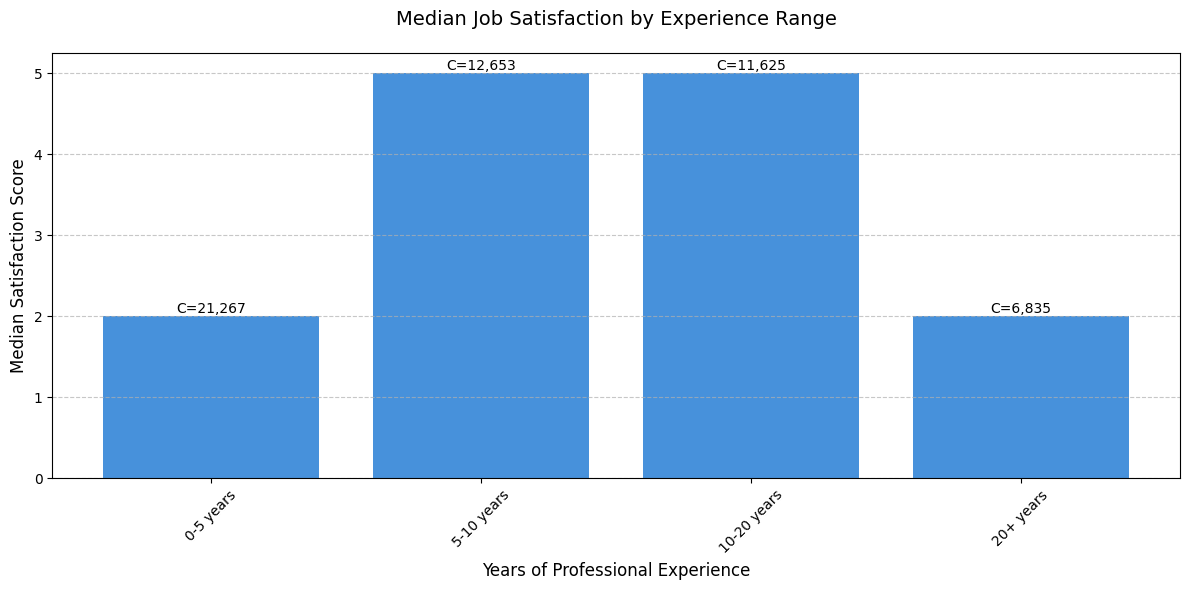

In [12]:
plt.figure(figsize=(12, 6))

# Create bar plot
ax = plt.gca()
bars = plt.bar(
satisfaction_by_exp.index,
satisfaction_by_exp['median'],
color='#1976D2',
alpha=0.8
)

# Add count annotations on top of bars
for bar, count in zip(bars, satisfaction_by_exp['count']):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f'C={count:,}',
        ha='center',
        va='bottom'
    )

# Customize plot
plt.title('Median Job Satisfaction by Experience Range', pad=20, fontsize=14)
plt.xlabel('Years of Professional Experience', fontsize=12)
plt.ylabel('Median Satisfaction Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_84/2049078343.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


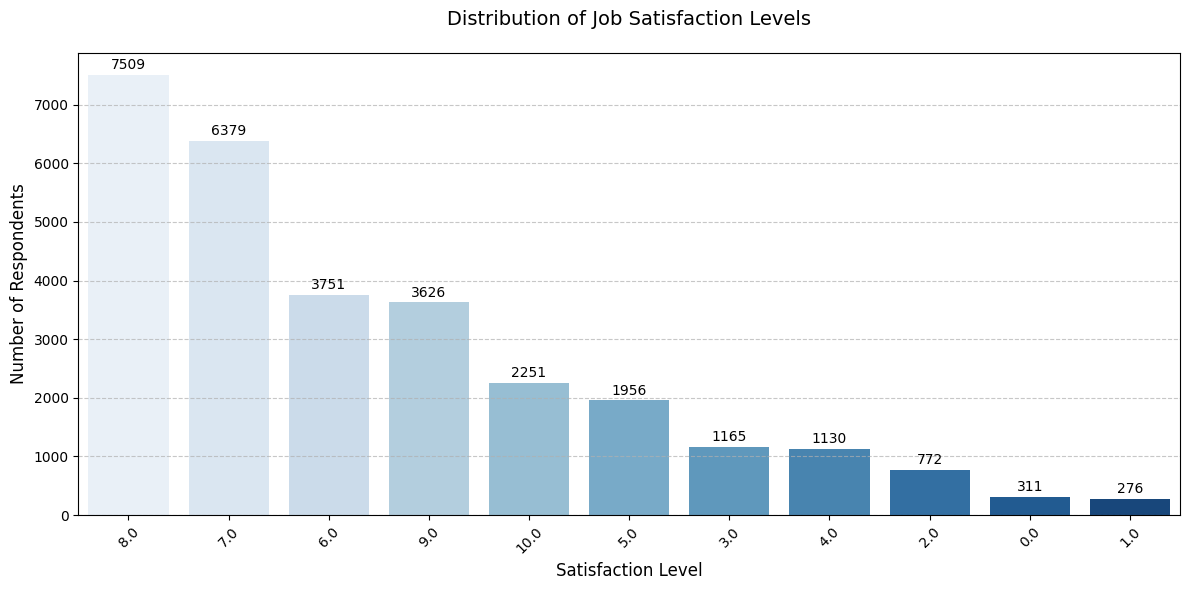

In [13]:
## Write your code here
plt.figure(figsize=(12, 6))

# Create count plot with custom styling
sns.countplot(
data=df,
x='JobSat',
palette='Blues',
order=df['JobSat'].value_counts().index
)

# Customize plot
plt.title('Distribution of Job Satisfaction Levels', pad=20, fontsize=14)
plt.xlabel('Satisfaction Level', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)

# Add value labels on top of bars
for i in plt.gca().containers:
    plt.gca().bar_label(
        i,
        label_type='edge',
        padding=2,
        fontsize=10
    )

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-labels if needed
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


In [14]:
## Write your code here
def analyze_remote_work_trends(df):
    """
    Analyzes remote work preferences across job roles
    """
    # Create cross-tabulation with percentage
    cross_tab = pd.crosstab(
        df['Employment'], 
        df['RemoteWork'], 
        margins=True,           # Add totals
        margins_name="Total"    # Label for the totals row and column
        #,normalize='index'
    ) #* 100
    
    # Prepare the HTML table to display
    table_html = cross_tab.round(2).to_html(classes='result-table')
    
    # Create the HTML content
    html_content = f"""
    <style>
        .analysis-container {{
            margin: 20px;
            font-family: Arial, sans-serif;
        }}
        .result-table {{
            width: 100%;
            border-collapse: collapse;
            margin: 15px 0;
            box-shadow: 0 2px 4px rgba(0,0,0,0.1);
        }}
        .result-table th {{
            background-color: #1976D2;
            color: white;
            padding: 12px;
            text-align: left;
        }}
        .result-table td {{
            padding: 10px;
            border-bottom: 1px solid #ddd;
        }}
        .highlight {{
            font-weight: bold;
            color: #2e7d32;
        }}
    </style>
    
    <div class='analysis-container'>
        <h3>Remote Work Preferences by Employment Type (%)</h3>
        {table_html}
    </div>
    """
    
    # Display HTML content
    display(HTML(html_content))
    
    return cross_tab
remote_work_stats = analyze_remote_work_trends(df)

RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote,Total
Employment,,,,
"Employed, full-time",17281,8552,13193,39026
"Employed, full-time;Employed, part-time",85,32,95,212
"Employed, full-time;Independent contractor, freelancer, or self-employed",1330,366,1861,3557
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time",80,17,87,184
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time;Retired",0,1,0,1
"Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work",0,2,0,2
"Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time",0,0,2,2
"Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time",0,1,0,1
"Employed, full-time;Independent contractor, freelancer, or self-employed;Retired",0,1,0,1


/tmp/ipykernel_84/1303961964.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


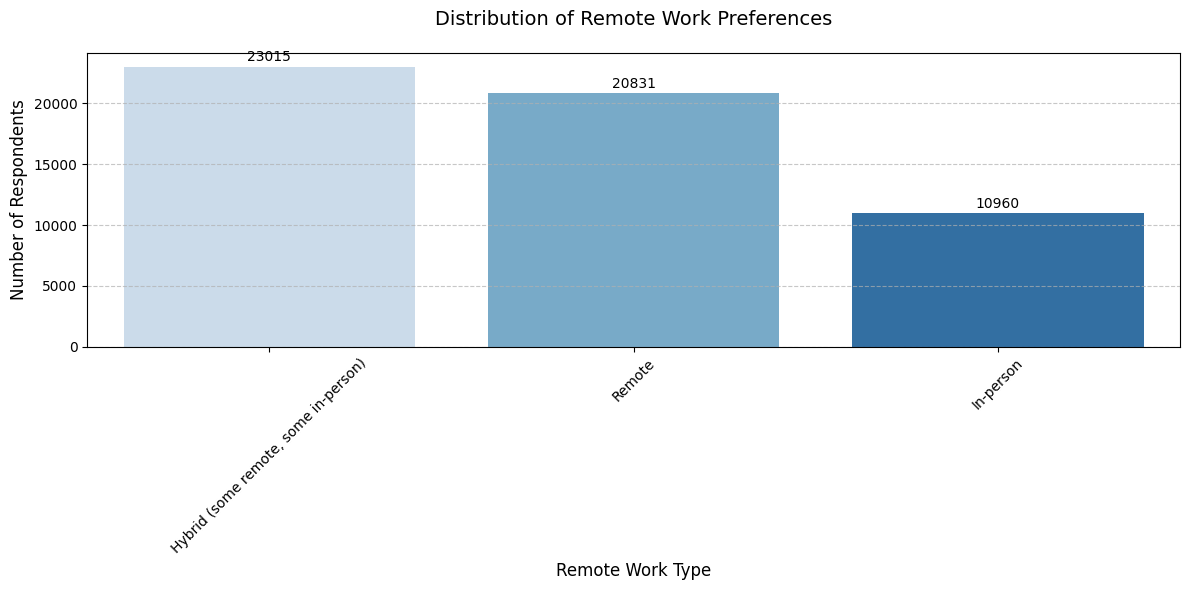

In [15]:
plt.figure(figsize=(12, 6))
    
    # Plot remote work distribution
sns.countplot(
        data=df,
        x='RemoteWork',
        palette='Blues',
        order=df['RemoteWork'].value_counts().index
    )
    
    # Add value labels
for i in plt.gca().containers:
    plt.gca().bar_label(i, label_type='edge', padding=2)
    
plt.title('Distribution of Remote Work Preferences', pad=20, fontsize=14)
plt.xlabel('Remote Work Type', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [31]:
## Write your code here
df['Languages'] = df['LanguageHaveWorkedWith'].str.split(';')

# Step 1: Ensure that we only try to split string values
df['Languages'] = df['LanguageHaveWorkedWith'].apply(lambda x: x.split(';') if isinstance(x, str) else [])

# Step 2: Flatten the lists and get the distinct (unique) values
all_languages = [language for sublist in df['Languages'] for language in sublist]
unique_languages = pd.Series(all_languages).unique()

# Step 3: Write the distinct values to a CSV file
unique_languages_df = pd.DataFrame(unique_languages, columns=['Language'])
#unique_languages_df.to_csv('distinct_languages.csv', index=False)

# Get top regions
top_regions = df['Country'].value_counts(ascending=False).head(10).index

# Create language popularity dictionary
language_popularity = {}

for region in top_regions:
        region_languages = df[df['Country'] == region]['Languages']
        #print(region_languages)
        language_counts = {}
        
        for lang_list in region_languages:
            if isinstance(lang_list, list):
                for lang in lang_list:
                    language_counts[lang] = language_counts.get(lang, 0) + 1
        
        # Get top 5 languages for each region
        language_popularity[region] = dict(
            sorted(language_counts.items(), key=lambda x: x[1], reverse=True)[:]
        )

 
 
# Prepare the HTML table to display
table_html = pd.DataFrame(language_popularity).to_html(classes='result-table')
    
    # Create the HTML content
html_content = f"""
    <style>
        .analysis-container {{
            margin: 20px;
            font-family: Arial, sans-serif;
        }}
        .result-table {{
            width: 100%;
            border-collapse: collapse;
            margin: 15px 0;
            box-shadow: 0 2px 4px rgba(0,0,0,0.1);
        }}
        .result-table th {{
            background-color: #1976D2;
            color: white;
            padding: 12px;
            text-align: left;
        }}
        .result-table td {{
            padding: 10px;
            border-bottom: 1px solid #ddd;
        }}
        .highlight {{
            font-weight: bold;
            color: #2e7d32;
        }}
    </style>
    
    <div class='analysis-container'>
        <h3>Remote Work Preferences by Employment Type (%)</h3>
        {table_html}
    </div>
    """
    
    # Display HTML content
display(HTML(html_content))


,United States of America,Germany,India,United Kingdom of Great Britain and Northern Ireland,Ukraine,France,Canada,Poland,Netherlands,Brazil
JavaScript,6849,2732,2730,2011,1532,1281,1296,851,906,932
Python,6238,2640,2128,1634,961,1186,1118,782,698,642
SQL,5766,2297,1986,1663,1215,1069,1073,724,727,787
HTML/CSS,5754,2514,2322,1707,1198,1114,1097,708,755,733
Bash/Shell (all shells),4776,1970,759,1231,579,858,798,552,518,408
TypeScript,4173,1868,1405,1190,980,861,796,593,636,576
C#,3112,1185,645,1089,612,410,603,430,439,344
Java,2949,1818,1549,701,664,706,571,460,424,423
C++,2607,1315,1127,651,430,567,488,457,312,207
C,2225,1147,1084,563,256,594,415,337,261,227


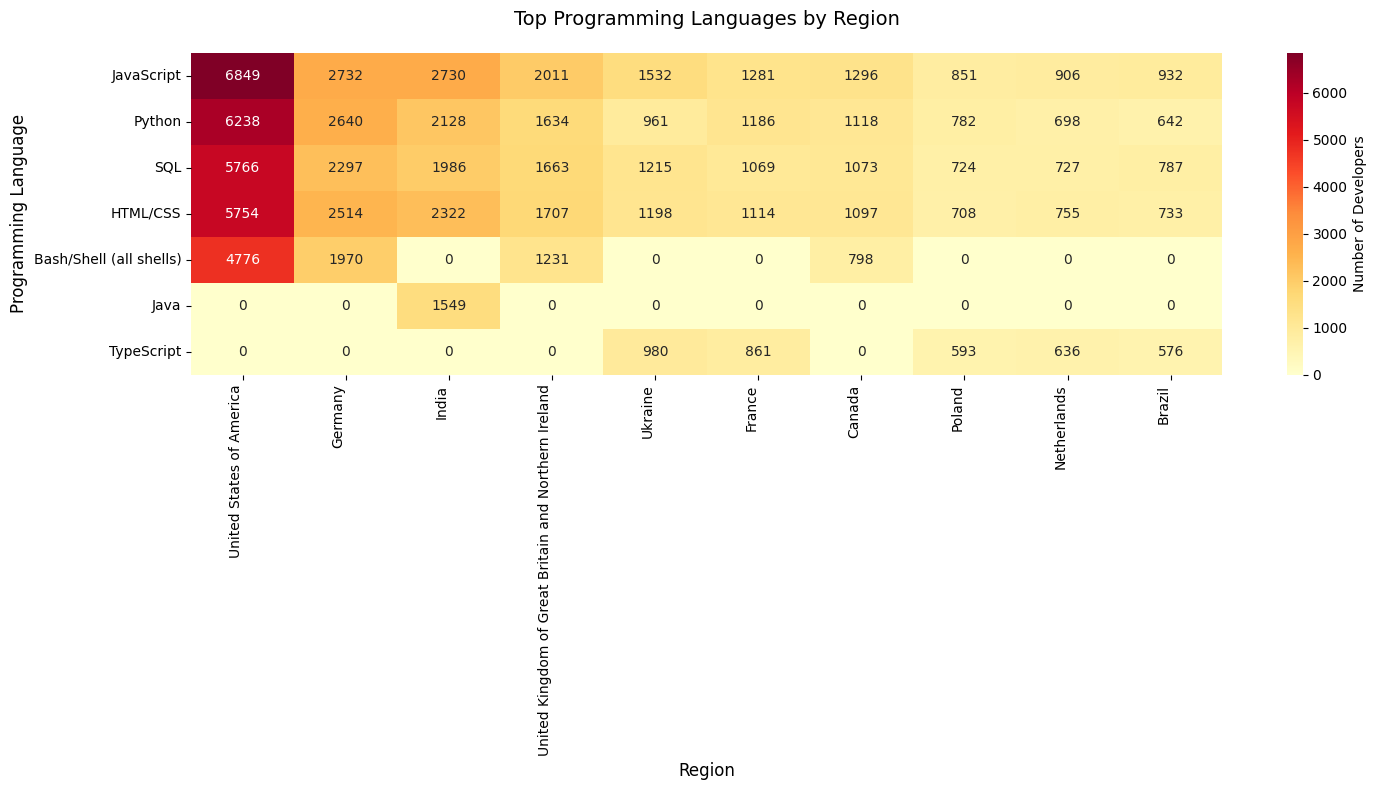

In [23]:
 # Create heatmap data
heatmap_data = pd.DataFrame(language_popularity).fillna(0)
    
    # Visualize with heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(
        heatmap_data,
        cmap='YlOrRd',
        annot=True,
        fmt='.0f',
        cbar_kws={'label': 'Number of Developers'}
    )
    
plt.title('Top Programming Languages by Region', pad=20, fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Programming Language', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


In [36]:
## Write your code here
def analyze_experience_satisfaction_correlation(df):
    """
    Visualizes correlation between years of experience and job satisfaction
    """
    # Calculate correlation coefficient
    correlation = df['YearsCodePro_int'].corr(df['JobSat'])
    
    # Display statistical summary
    html_content = f"""
    <style>
        .stats-container {{
            margin: 20px;
            font-family: Arial, sans-serif;
            padding: 15px;
            background-color: black;
            border-radius: 8px;
            box-shadow: 0 2px 4px rgba(0,0,0,0.1);
        }}
        .highlight {{
            color: #1976D2;
            font-weight: bold;
        }}
    </style>
    
    <div class='stats-container'>
        <h3>Experience-Satisfaction Analysis</h3>
        <p>Correlation Coefficient: <span class='highlight'>{correlation:.3f}</span></p>
        <p>Number of Observations: <span class='highlight'>{len(df):,}</span></p>
    </div>
    """
    
    display(HTML(html_content))
    return correlation

# Execute analysis
correlation_stat = analyze_experience_satisfaction_correlation(df)

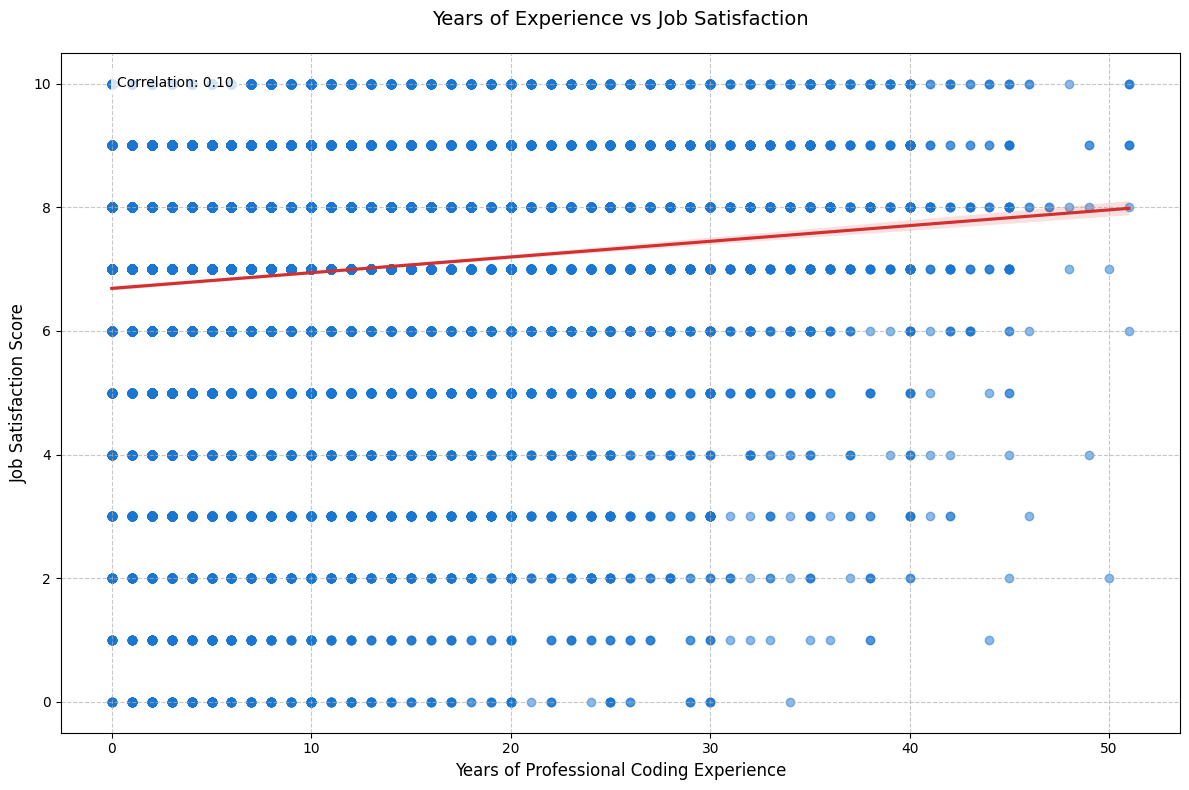

In [39]:
plt.figure(figsize=(12, 8))
    
    # Create scatter plot with trend line
sns.regplot(
        data=df,
        x='YearsCodePro_int',
        y='JobSat',
        scatter_kws={'alpha': 0.5, 'color': '#1976D2'},
        line_kws={'color': '#D32F2F'}
    )
    
    
    
    # Customize plot
plt.title('Years of Experience vs Job Satisfaction', pad=20, fontsize=14)
plt.xlabel('Years of Professional Coding Experience', fontsize=12)
plt.ylabel('Job Satisfaction Score', fontsize=12)
    
    # Add correlation annotation
plt.annotate(
        f'Correlation: {correlation_stat:.2f}',
        xy=(0.05, 0.95),
        xycoords='axes fraction',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none')
    )
    
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
    

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


/tmp/ipykernel_84/4067087694.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1500x800 with 0 Axes>

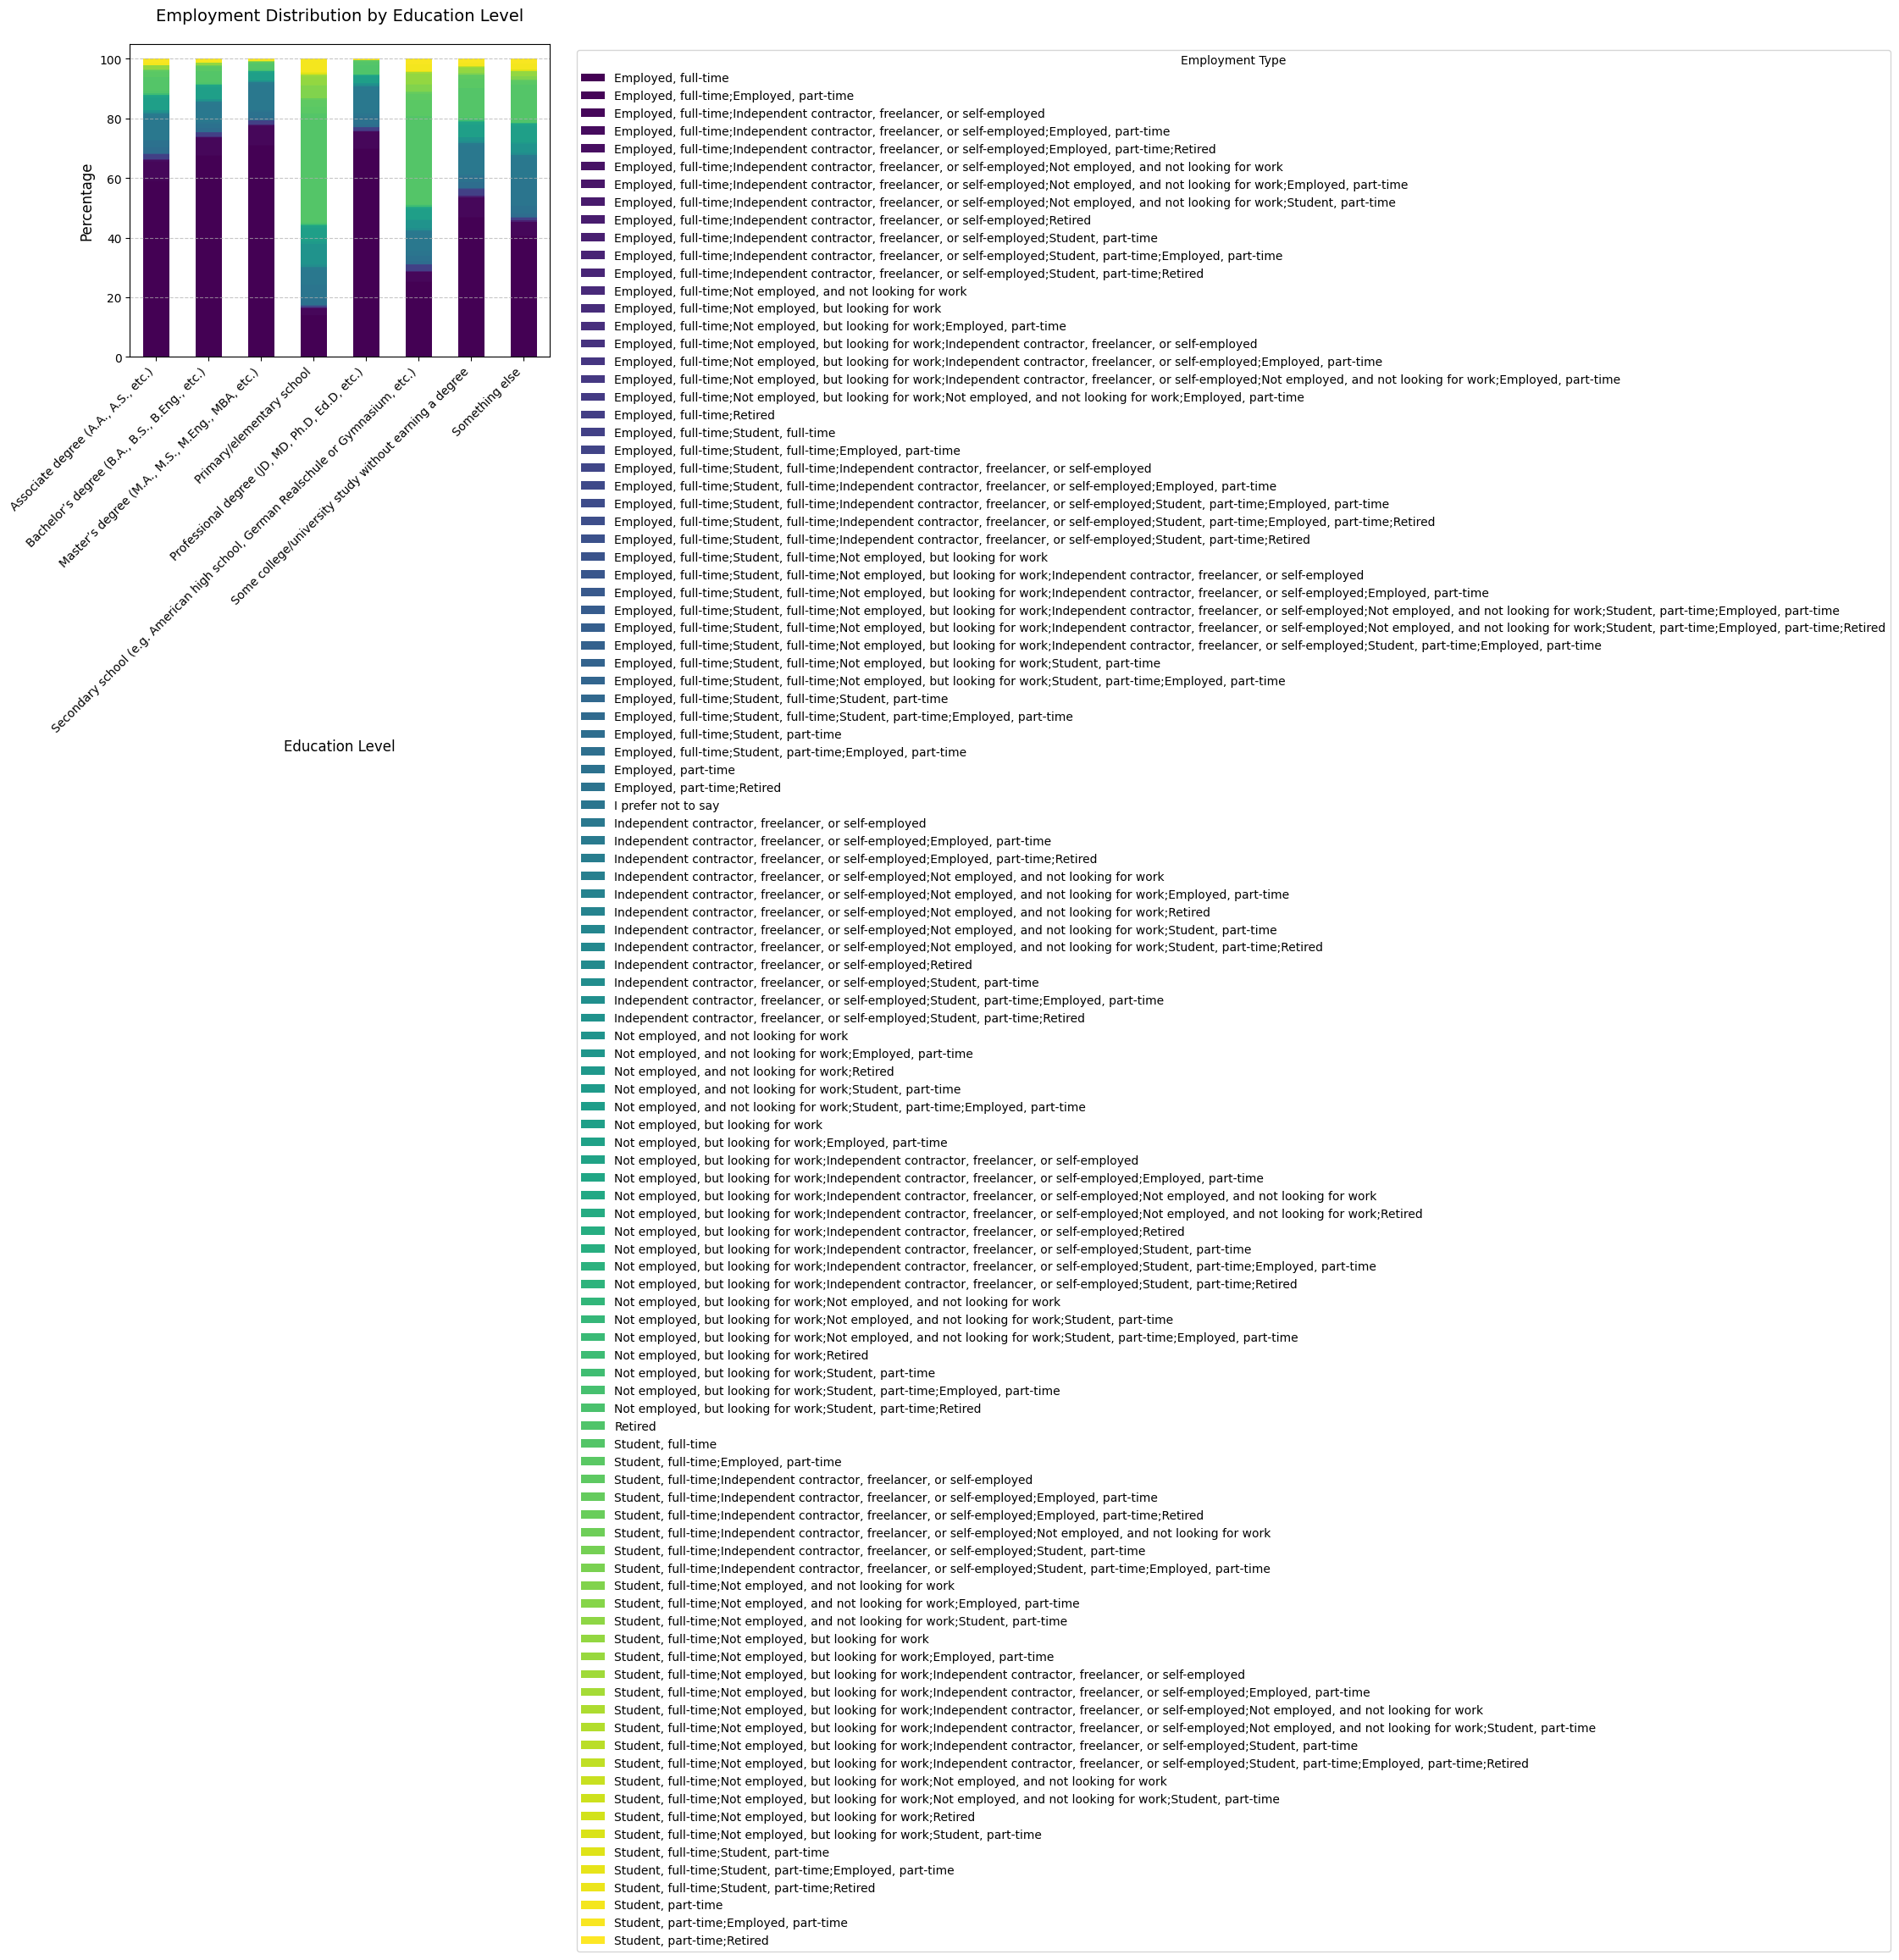

In [61]:
## Write your code here
# Visualization
cross_tab = pd.crosstab(
        df['EdLevel'],
        df['Employment'],
        normalize='index'
    ) * 100
plt.figure(figsize=(15, 8))
    
    # Create stacked bar plot
cross_tab.plot(
        kind='bar',
        stacked=True,
        colormap='viridis'
    )
    
plt.title('Employment Distribution by Education Level', pad=20, fontsize=14)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [62]:
encoded_df, categories = create_advanced_encoding(df)
cols=['Employment_Employedfulltime','Employment_Employedparttime','Employment_Studentfulltime','Employment_Studentparttime','Employment_Retired']

/tmp/ipykernel_84/645569767.py:34: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


Employment_Employedfulltime,0,1
EdLevel,,
"Associate degree (A.A., A.S., etc.)",29.73,70.27
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23.28,76.72
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",19.72,80.28
Primary/elementary school,82.46,17.54
"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",22.15,77.85
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",67.89,32.11
Some college/university study without earning a degree,41.26,58.74
Something else,51.93,48.07
Employment_Employedparttime,0,1


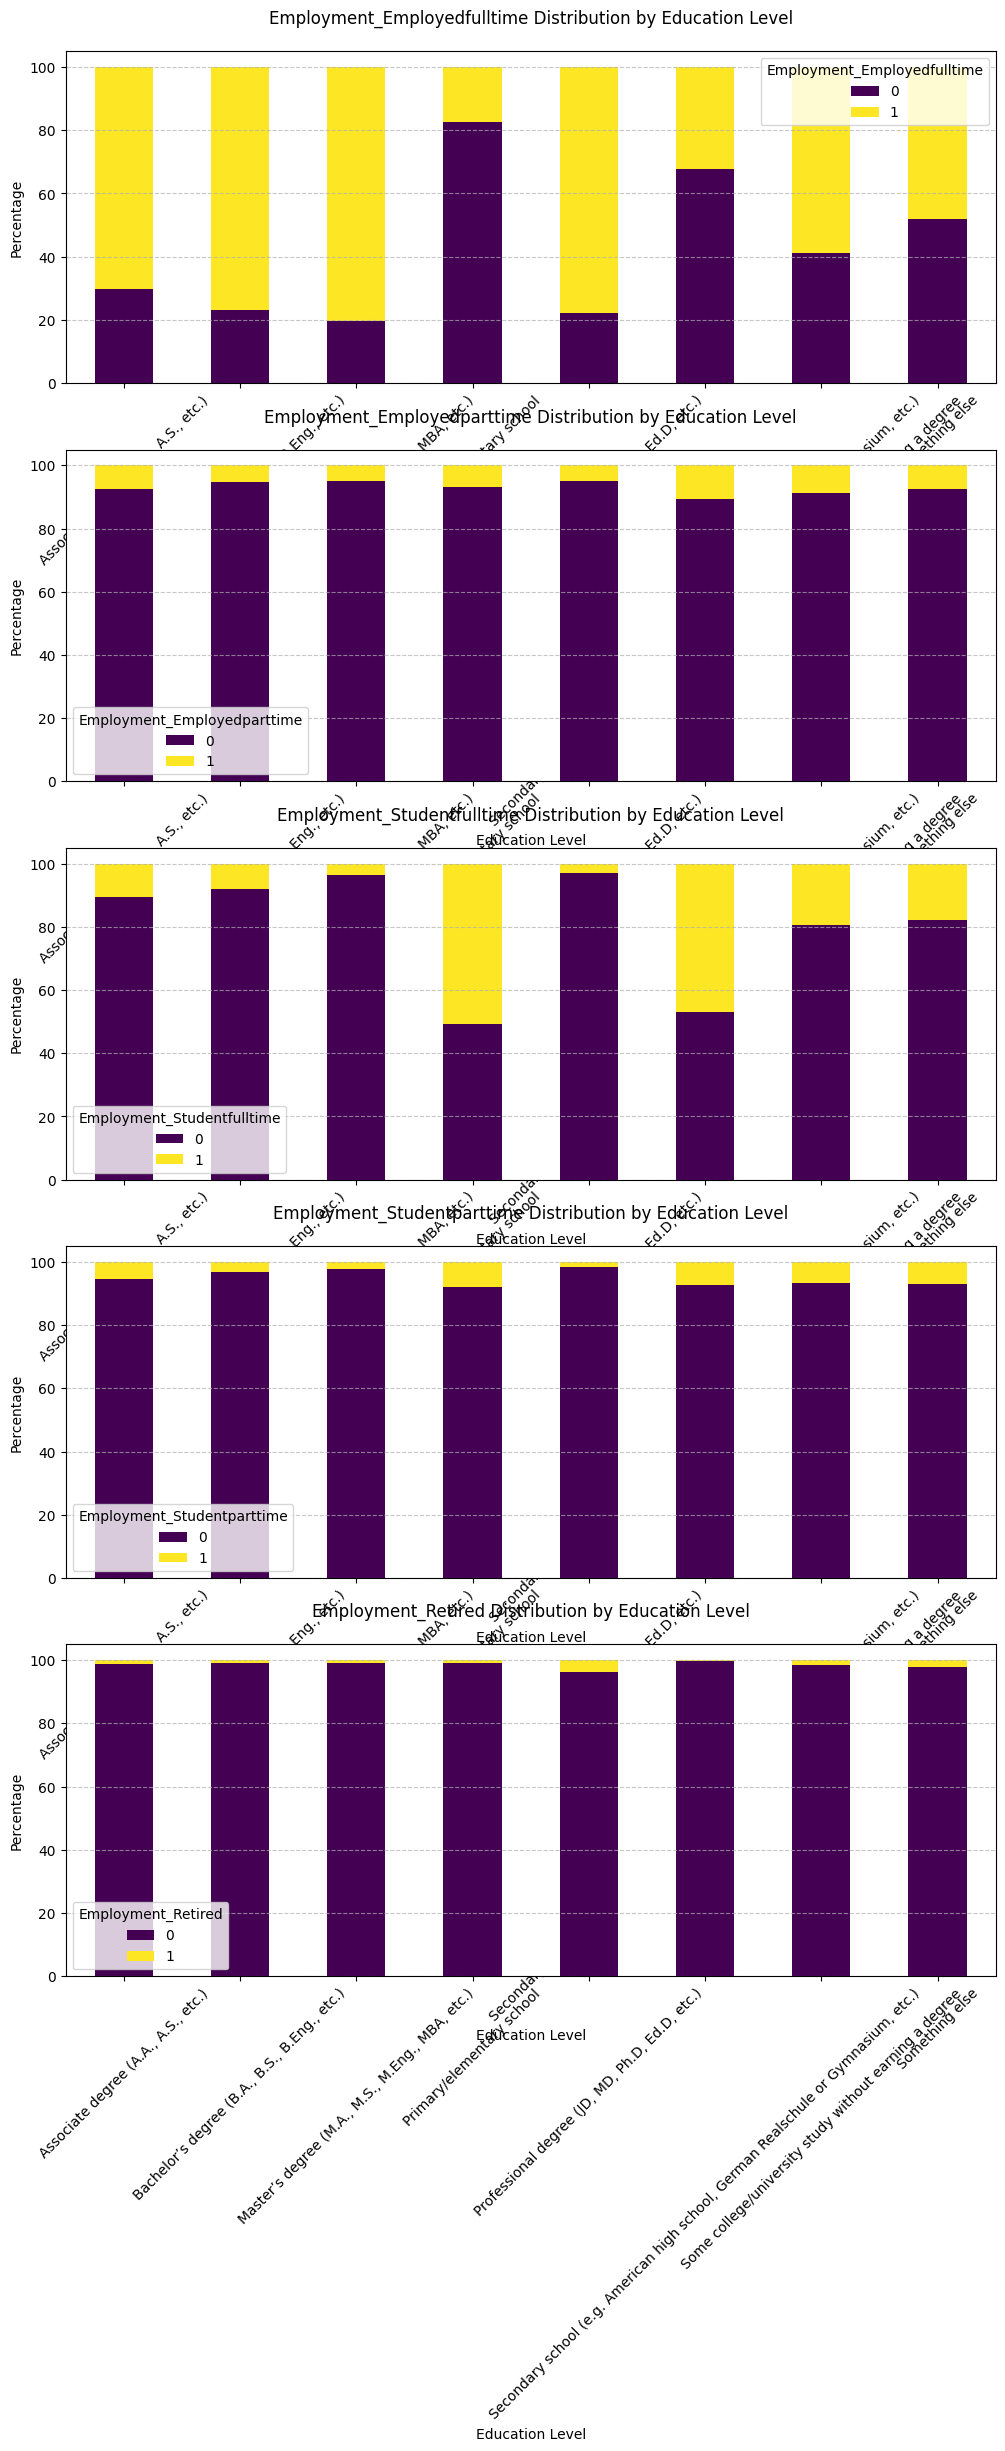

In [64]:
def analyze_education_multiple_employment(df, employment_columns):
    """
    Analyzes education level against multiple employment type columns
    """
    # Store cross-tabs for each employment type
    cross_tabs = {}
    
    for col in employment_columns:
        cross_tabs[col] = pd.crosstab(
            df['EdLevel'],
            df[col],
            normalize='index'
        ) * 100
    
    # Create visualizations
    num_cols = len(employment_columns)
    fig, axes = plt.subplots(num_cols, 1, figsize=(12, 5*num_cols))
    
    for idx, (col, data) in enumerate(cross_tabs.items()):
        # Create stacked bar plot for each employment type
        data.plot(
            kind='bar',
            stacked=True,
            ax=axes[idx] if num_cols > 1 else axes,
            colormap='viridis'
        )
        
        axes[idx].set_title(f'{col} Distribution by Education Level', pad=20)
        axes[idx].set_xlabel('Education Level')
        axes[idx].set_ylabel('Percentage')
        axes[idx].grid(axis='y', linestyle='--', alpha=0.7)
        axes[idx].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    
    # Display statistical summary
    html_content = """
    <style>
        .analysis-container {
            margin: 20px;
            font-family: Arial, sans-serif;
        }
        .result-table {
            width: 100%;
            border-collapse: collapse;
            margin: 15px 0;
            box-shadow: 0 2px 4px rgba(0,0,0,0.1);
        }
        .result-table th {
            background-color: #1976D2;
            color: white;
            padding: 12px;
        }
        .result-table td {
            padding: 10px;
            border-bottom: 1px solid #ddd;
        }
    </style>
    """
    
    for col, data in cross_tabs.items():
        html_content += f"""
        <div class='analysis-container'>
            <h3>{col} Distribution</h3>
            {data.round(2).to_html(classes='result-table')}
        </div>
        """
    
    display(HTML(html_content))
    return cross_tabs

# Example usage
education_employment_stats = analyze_education_multiple_employment(encoded_df, cols)

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [65]:
## Write your code here
encoded_df.to_csv('gs_survey_data.csv', index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
